In [3]:
import numpy as np
import pandas as pd
import sys
sys.path.append('../')  # Add the parent directory to the Python path
import mathix as mx
def getStats(arr):
    return np.mean(arr),np.median(arr), np.std(arr) , np.var(arr),np.min(arr), max(arr), np.ptp(arr)    
def printStats(arr, name):
    print("Stats for ", name)
    print("Mean: ", np.mean(arr))
    # print("Median: ", np.median(arr))
    print("Std: ", np.std(arr))
    # print("Var: ", np.var(arr))
    print("Min: ", np.min(arr))
    print("Max: ", np.max(arr))
    # print("PtP: ", np.ptp(arr))
    
    
m1Path = "rssi_raw1m.log"
m2Path = "rssi_raw2m.log"
m3Path = "rssi_raw3m.log"
        
df1 = pd.read_csv(m1Path)
arr1 = np.array(df1["rssi"])
printStats(arr1, "1 Meter")

df2 = pd.read_csv(m2Path)
arr2 = np.array(df2["rssi"])
printStats(arr2, "2 Meter")

df3 = pd.read_csv(m3Path)
arr3 = np.array(df3["rssi"])
printStats(arr3, "3 Meter")

def fspl(d, f):
    c = 3e8
    return 20 * np.log10(d) + 20 * np.log10(f) - 147.55


Stats for  1 Meter
Mean:  -45.2972972972973
Std:  1.430646515444978
Min:  -49
Max:  -43
Stats for  2 Meter
Mean:  -53.774193548387096
Std:  1.47472638073064
Min:  -57
Max:  -50
Stats for  3 Meter
Mean:  -54.734693877551024
Std:  1.2580436740753014
Min:  -57
Max:  -51


In [4]:
# Calculate the distance from the RSSI value
print("Distance from 1m RSSI")
print("FSPL for 1m: ", fspl(1, 2.4e9))
print("FSPL for 2m: ", fspl(2, 2.4e9))
print("FSPL for 3m: ", fspl(3, 2.4e9))


# Caluclate mathix fspl

fspl1 = mx.rssi_with_walls(distance_m=1, n=2.81, include_fading=False)
print("Mathix FSPL for 1m: ", fspl1)

fspl2 = mx.rssi_with_walls(distance_m=2, n=2.81, include_fading=False)
print("Mathix FSPL for 2m: ", fspl2)


fspl3 = mx.rssi_with_walls(distance_m=3, n=2.81, include_fading=False)
print("Mathix FSPL for 3m: ", fspl3)

Distance from 1m RSSI
FSPL for 1m:  40.054224834232116
FSPL for 2m:  46.07482474751174
FSPL for 3m:  49.59664992862537
Mathix FSPL for 1m:  -47.29
Mathix FSPL for 2m:  -55.74894287815787
Mathix FSPL for 3m:  -60.69710725762251


In [5]:
#pathloss exponent
rssi1 = arr1.mean()
rssi3 = arr3.mean()

print("RSSI 1m: ", rssi1)
print("RSSI 3m: ", rssi3)
# Calculate the path loss exponent



def path_loss_exponent(rssi1_dbm, rssi2_dbm, d1, d2):
    return (rssi1_dbm - rssi2_dbm) / (10 * np.log10(d2 / d1))




# Calculate the path loss exponent between 1m and 3m
n_1_3 = path_loss_exponent(rssi1, rssi3, 1, 3)
print("Path loss exponent between 1m and 3m: ", n_1_3)

n_1_2 = path_loss_exponent(rssi1, arr2.mean(), 1, 2)
print("Path loss exponent between 1m and 2m: ", n_1_2)
# n_2_3 = path_loss_exponent(arr2.mean(), rssi3, 2, 3)
# print("Path loss exponent between 2m and 3m: ", n_2_3)


RSSI 1m:  -45.2972972972973
RSSI 3m:  -54.734693877551024
Path loss exponent between 1m and 3m:  1.9779870393321226
Path loss exponent between 1m and 2m:  2.8159639813940553


Linear Regression Results:
   Distance (m)  RSSI (dBm)  Path Loss (dB)  log10(Distance)  \
0             1  -45.297297       45.297297         0.000000   
1             2  -53.774194       53.774194         0.301030   
2             3  -54.734694       54.734694         0.477121   

   Predicted Path Loss (dB)  
0                 45.904096  
1                 52.130065  
2                 55.772023  


(np.float64(2.06822210262444), <Figure size 640x480 with 1 Axes>)

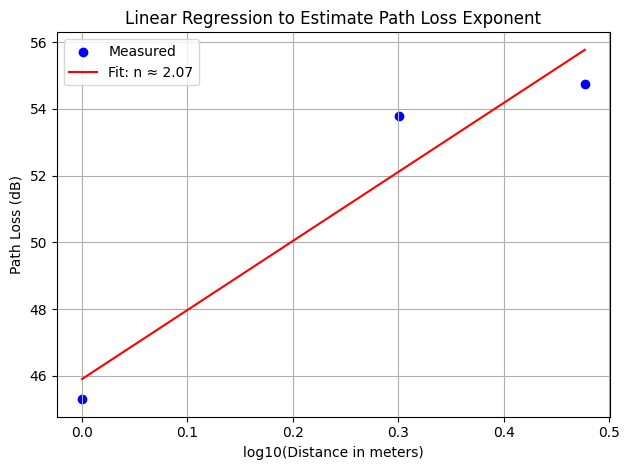

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Given distances (in meters) and mean RSSI values
distances = np.array([1, 2, 3])
rssi_values = np.array([arr1.mean(), arr2.mean(), arr3.mean()])  # Use mean RSSI values
path_loss_values = -rssi_values  # Convert RSSI to path loss

# Prepare data for linear regression
log_distances = np.log10(distances).reshape(-1, 1)
path_loss_values = path_loss_values.reshape(-1, 1)

# Perform linear regression
reg = LinearRegression()
reg.fit(log_distances, path_loss_values)

# Calculate path loss exponent
n_global = reg.coef_[0][0] / 10  # because slope = 10n

# Generate predicted values for plotting
predicted_path_loss = reg.predict(log_distances)

# Plot the data and regression line
plt.scatter(log_distances, path_loss_values, label="Measured", color="blue")
plt.plot(log_distances, predicted_path_loss, label=f"Fit: n ≈ {n_global:.2f}", color="red")
plt.xlabel("log10(Distance in meters)")
plt.ylabel("Path Loss (dB)")
plt.title("Linear Regression to Estimate Path Loss Exponent")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    "Distance (m)": distances,
    "RSSI (dBm)": rssi_values.flatten(),
    "Path Loss (dB)": path_loss_values.flatten(),
    "log10(Distance)": log_distances.flatten(),
    "Predicted Path Loss (dB)": predicted_path_loss.flatten()
})

# Display the DataFrame
print("Linear Regression Results:")
print(results_df)

n_global, plt.gcf()


In [7]:



m3wallspath = "rssi_raw3wm.log"

df3walls = pd.read_csv(m3wallspath)
arr3walls = np.array(df3walls["rssi"])
# printStats(arr3walls, "3 Meter with walls")
# arr3walls = arr3walls - 2.81 * 10 * np.log10(3) + 2.81 * 10 * np.log10(1)


print("Mean RSSI for 3m with walls: ", np.mean(arr3walls))
print("Mean RSSI for 3m: ", np.mean(arr3))

diff =np.mean(arr3walls)-  np.mean(arr3)

print("Difference between 3m and 3m with walls: ", diff)

Mean RSSI for 3m with walls:  -53.94444444444444
Mean RSSI for 3m:  -54.734693877551024
Difference between 3m and 3m with walls:  0.790249433106581


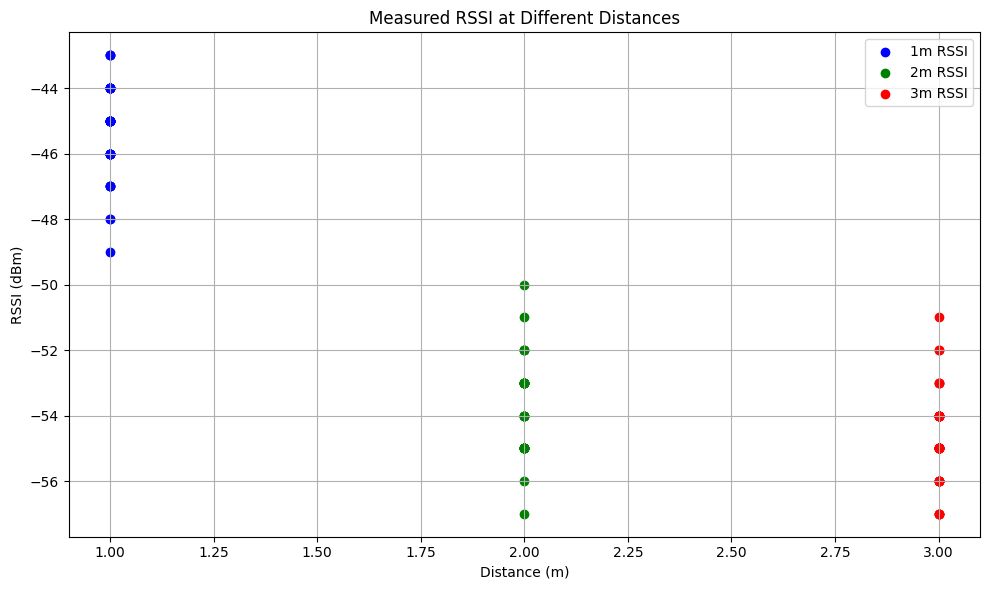

In [8]:
plt.figure(figsize=(10, 6))

plt.scatter([1] * len(arr1), arr1, label="1m RSSI", color="blue")
plt.scatter([2] * len(arr2), arr2, label="2m RSSI", color="green")
plt.scatter([3] * len(arr3), arr3, label="3m RSSI", color="red")

plt.xlabel("Distance (m)")
plt.ylabel("RSSI (dBm)")
plt.title("Measured RSSI at Different Distances")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


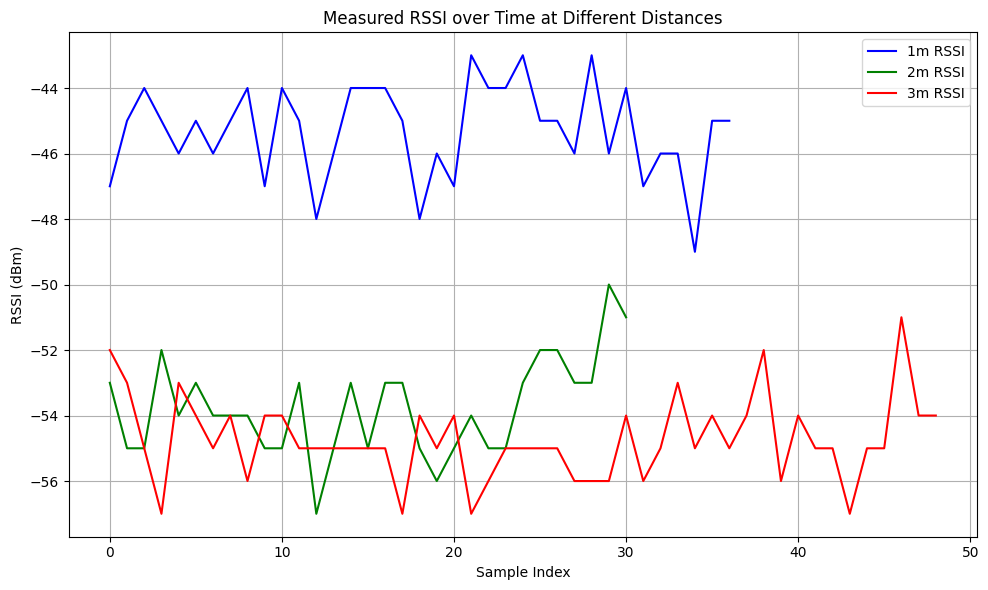

In [9]:



plt.figure(figsize=(10, 6))

plt.plot(arr1, label="1m RSSI", color="blue")
plt.plot(arr2, label="2m RSSI", color="green")
plt.plot(arr3, label="3m RSSI", color="red")

plt.xlabel("Sample Index")
plt.ylabel("RSSI (dBm)")
plt.title("Measured RSSI over Time at Different Distances")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
